In [501]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
try:
    import spacepy.plot as splot
except:
    pass

%matplotlib inline

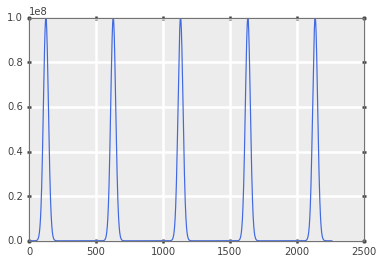

In [502]:
series = 10**(8*np.sin(np.arange(0,9*np.pi,0.0125)))
plt.plot(series)

In [503]:
np.random.seed(1977)
noise3 = np.random.choice([0,1], size=len(series), replace=True)

In [504]:
swn3 = []
for idx, n in enumerate(noise3):
    if n:
        swn3.append(series[idx]/2)
    else:
        swn3.append(series[idx]*2)
swn3 = np.array(swn3)

In [505]:
swn1 = series*2

In [506]:
swn2 = series/2

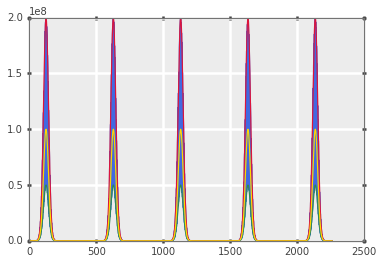

In [507]:
plt.plot(swn3)
plt.plot(swn2)
plt.plot(swn1)
plt.plot(series)

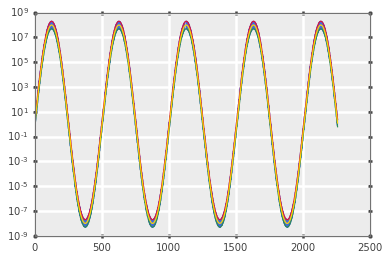

In [508]:
plt.semilogy(swn3)
plt.semilogy(swn2)
plt.semilogy(swn1)
plt.semilogy(series)

In [509]:
def MAPE(obs, mod):
    relerr = (mod-obs)/obs
    percerr = relerr*100
    ape = np.abs(percerr)
    return ape.mean()

In [510]:
def mysymMAPE(obs,mod):
    big = np.empty_like(obs)
    small = np.empty_like(obs)
    for idx in range(len(obs)):
        small[idx] = obs[idx] if not(obs[idx]>mod[idx]) else mod[idx]
        big[idx] = obs[idx] if (obs[idx]>mod[idx]) else mod[idx]
    relerr = (big-small)/small
    percerr = relerr*100
    ape = np.abs(percerr)
    return np.median(ape)#ape.mean()

In [511]:
MAPE(swn3, series)

74.115826702033601

In [512]:
MAPE(swn1, series)

50.0

In [513]:
MAPE(swn2, series)

100.0

So if we break MAPE by using log-transformed data, what happens?

In [514]:
MAPE(np.log10(swn1),np.log10(series))

38.312568585775793

In [515]:
MAPE(np.log10(swn2),np.log10(series))

40.888139406118242

In [516]:
MAPE(np.log10(swn3),np.log10(series))

47.100127072450995

Note that this is still asymmetric. 

Now we check what the median symmetric accuracy gives us in these cases...

In [517]:
def MSA(obs,mod):
    q = obs/mod
    abslogq = np.abs(np.log10(q))
    medabslogq = np.median(abslogq)
    msa = 10**(medabslogq)-1
    return msa*100

In [518]:
MSA(swn1, series)

100.0

In [519]:
MSA(swn2, series)

100.0

In [520]:
MSA(swn3, series)

100.0

So the median symmetric accuracy returns the same error in all cases, and is demonstrated to be symmetric to over- and under-prediction.

In [521]:
mysymMAPE(swn3, series)

100.0

## Magnetic field model test case... field falls off with r^3

In [522]:
lvals = np.arange(1,7,0.1)
bserieswl = 30000/lvals**3.

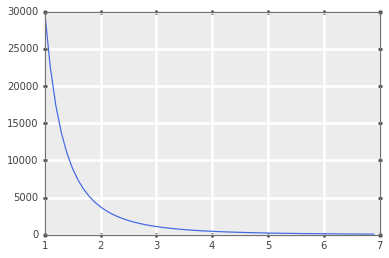

In [523]:
plt.plot(lvals, bserieswl)

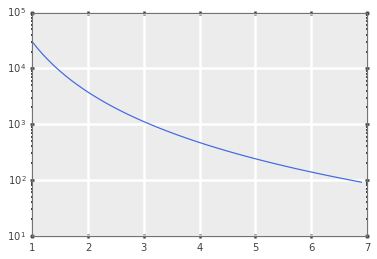

In [524]:
plt.semilogy(lvals, bserieswl)

Add an error that depends on L, larger error at low L (where values are high) and smaller at high L.

In [525]:
b_fac_l7 = (5.0/100)+1
b_fac_l1 = (50.0/2e4)+1
b_fac_l1, b_fac_l7

(1.0025, 1.05)

In [526]:
noisewl = np.interp(lvals, [1,7], [b_fac_l1,b_fac_l7])

In [527]:
noisewl3 = np.random.choice([0,1], size=len(bserieswl), replace=True)
bwn3 = noisewl3.copy()
#now filter by 1 or 0 and mult or divide...
bwn3[noisewl3>0] = bserieswl[noisewl3>0]/noisewl[noisewl3>0]
bwn3[noisewl3==0] = bserieswl[noisewl3==0]*noisewl[noisewl3==0]

[ 75.         -74.44402705  70.88888889 -66.98406919  61.05539359
 -57.88888889  52.78125     48.75127214 -46.03292181  41.18457501  39.
  35.60900551  33.56949662  31.31412838 -29.13888889  27.          25.12699135
 -24.15790276 -22.6180758  -22.0627332  -20.11111111 -19.01554161
  17.47265625  17.20577678 -16.28109098 -15.70845481  13.99588477
  13.73498115 -13.72692812 -12.74015071  12.25       -12.28097387
  11.07612569 -11.32526696   9.82118708   9.781893   -10.21073395
  -8.95331478   8.73263889   8.00420743   8.          -8.15736029
   6.64087392  -7.50862793   6.48026216  -7.31555222   6.17274052
   6.00683611  -6.75784165  -6.07140944  -5.88888889   4.83034703
   5.1230573    5.02255576   4.55908203  -5.23987255   4.6507221
  -4.74631188  -4.41013637   3.67830105]


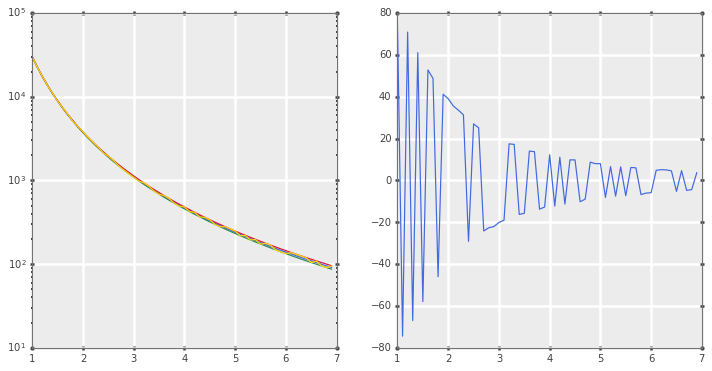

In [528]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.semilogy(lvals, bserieswl)
ax1.semilogy(lvals, bserieswl/noisewl)
ax1.semilogy(lvals, bserieswl*noisewl)
ax1.semilogy(lvals, bwn3)
ax2.plot(lvals, bwn3-bserieswl)
print(bwn3-bserieswl)

[I could do this with various error models, or I could just take a fly-through of RBSP (5ish orbits) in the TS04 model and plot errors as a function of magnitude so we can see how the error magnitude scales and whether there is a systematic error.]

In [529]:
print MAPE(bserieswl/noisewl, bserieswl)
print MAPE(bserieswl*noisewl, bserieswl)
print MAPE(bwn3, bserieswl)

2.58541666667
2.50284072179
2.52149917559


In [530]:
print MSA(bserieswl/noisewl, bserieswl)
print MSA(bserieswl*noisewl, bserieswl)
print MSA(bwn3, bserieswl)

2.58540902991
2.58540902991
2.59877016778


### And let's see what they all give for a constant magnitude error...

In [531]:
cmerr=[2,4,8,16,32,64]

for cme in cmerr:
    print (cme)
    print MAPE(bserieswl+cme, bserieswl)
    print MAPE(bserieswl-cme, bserieswl)
    #print MAPE(bwn3, bserieswl)

    print MSA(bserieswl+cme, bserieswl)
    print MSA(bserieswl-cme, bserieswl)
    #print MSA(bwn3, bserieswl)
    
    print mysymMAPE(bserieswl+cme, bserieswl)
    print mysymMAPE(bserieswl-cme, bserieswl)

2
0.639642330203
0.656217238086
0.411062120997
0.412761270963
0.411063333333
0.412762503419
4
1.26346259881
1.32981589807
0.822121837092
0.828946608127
0.822126666667
0.828951599505
8
2.46640721027
2.73268352564
1.64423417128
1.67176146066
1.64425333333
1.67178193103
16
4.71058662267
5.78979257995
3.28843123861
3.40041276406
3.28850666667
3.40049889345
32
8.66164785448
13.2246854836
6.57672093035
7.04041973681
6.57701333333
7.0408019339
64
15.0088497535
39.4029862626
13.1529250339
15.1482894898
13.1540266667
15.1501926424


In [532]:
def sMAPE(obs, mod):
    n = len(obs)
    norm = 100.0/n
    spe = np.abs(mod-obs)/((np.abs(mod)+np.abs(obs))/2.)
    smape = spe.mean()
    return norm*smape

In [533]:
print('MAPE - untransformed data')
m1 = MAPE(np.array([1e2]), np.array([2.7e3]))
m2 = MAPE(np.array([2.7e3]), np.array([1e2]))
print('obs={}, mod={}, MAPE={}'.format(1e2, 2.7e3, m1))
print('obs={}, mod={}, MAPE={}'.format(2.7e3, 1e2, m2))
print('MAPE asymmetry = {}'.format(m1/m2))
print('\nMAPE - log10 transformed data')
ml1 = MAPE(np.log10(np.array([1e2])), np.log10(np.array([2.7e3])))
ml2 = MAPE(np.log10(np.array([2.7e3])), np.log10(np.array([1e2])))
print(ml1)
print(ml2)
print('MAPE (log) asymmetry = {}'.format(ml1/ml2))
print('\nsMAPE [Makridakis, 1993]')
sm1 = sMAPE(np.array([1e2]), np.array([2.7e3]))
sm2 = sMAPE(np.array([2.7e3]), np.array([1e2]))
print(sm1)
print(sm2)
print('sMAPE asymmetry = {}'.format(sm1/sm2))
print('\nMSA [Morley, 2016]')
msa1 = MSA(np.array([1e2]), np.array([2.7e3]))
msa2 = MSA(np.array([2.7e3]), np.array([1e2]))
print(msa1)
print(msa2)

MAPE - untransformed data
obs=100.0, mod=2700.0, MAPE=2600.0
obs=2700.0, mod=100.0, MAPE=96.2962962963
MAPE asymmetry = 27.0

MAPE - log10 transformed data
71.5681882079
41.7141364932
MAPE (log) asymmetry = 1.71568188208

sMAPE [Makridakis, 1993]
185.714285714
185.714285714
sMAPE asymmetry = 1.0

MSA [Morley, 2016]
2600.0
2600.0


From the results above we see that MAPE is highly asymmetric with respect to over- and under-forecasting (for the same order of difference). Using the logs - which we know is incorrect - is still asymmetric, but also radically underestimates the error. The given values of ~71% and ~42% certainly do not imply to a reader that the difference was a factor of 27. Indeed, they could naively be interpreted as showing an error that is less than a factor of 2.
Though sMAPE is now symmetric when given over- or under-forecasts by the same order, the "percentage error" of ~186% again does not intuitively recover the scale of the error. 
Of the given measures only the MSA indicates that the error is greater than an order of magnitude and does not depend on the sense of the forecast error.

In [534]:
mysymMAPE(np.array([2.7e3]), np.array([1e2]))

2600.0

So as I see in my tests above - this isn't just "interpretable" as a percentage error, it IS the median percentage error if we always set the "observation" to be the larger value and the "model" to be the smaller value. This is essentially an extension of Chen's "matching ratio". As the accuracy ratio is the complement of the relative error (Q = 1-R), we can calculate the percentage error using the relative error implied by the matching ratio. This gives us Perc.Err = 100 * (j<sub>large</sub>-j<sub>small</sub>)/j<sub>small</sub>

This implies that I want to introduce the metric via the log accuracy ratio of Tofallis, and then take the median as a measure of central tendency, then convert to percentage scale.
After various tests, etc. I should then have a section titled "Interpretation and derivation as a percentage error". Where I approach from the matching ratio, convert back to an implied relative error and calculate the percentage error.

So now to justify the median... what is the distribution of APE (using above definition)? I can use arguments and provide citations to, e.g., Coleman and Swanson [2007] and Tofallis [2015]. I should also show an example that's believable for space physics... faked up particle data? faked up B-field? real particle data? If the distribution of relative error is skewed then so is the distribution of accuracy ratio (and vice versa). We symmetrize by taking logs (Tofallis [2015], Morley et al. [2016] and Morley [2016]), and then show the median as a robust measure of central tendency [Morley et al., 2016] as outliers are still present and the log-transform is one of a family of power transforms (an may not be the best one).

In Coleman and Swanson [2007] they refer to the National Research Council as saying a summary measure of error should meet 5 basic criteria. I should couple this with the list of desirable criteria that I have for radiation belt model assessment and use this to justify the use of my accuracy metric when the desirable criteria given match the problem.

In [535]:
def APEdist(obs,mod):
    big = np.empty_like(obs).astype(float)
    small = np.empty_like(obs).astype(float)
    for idx in range(len(obs)):
        small[idx] = obs[idx] if not (obs[idx]>mod[idx]) else mod[idx]
        big[idx] = obs[idx] if (obs[idx]>mod[idx]) else mod[idx]
    relerr = (big-small)/small
    percerr = relerr*100
    ape = np.abs(percerr)
    return ape

In [536]:
ad = APEdist(bwn3, bserieswl)

(array([ 5.,  3.,  5.,  4.,  4.,  3.,  4.,  5.,  4.,  6.,  4.,  4.,  3.,
         3.,  3.]),
 array([ 0.25      ,  0.5692226 ,  0.8884452 ,  1.2076678 ,  1.5268904 ,
         1.846113  ,  2.1653356 ,  2.4845582 ,  2.8037808 ,  3.1230034 ,
         3.442226  ,  3.7614486 ,  4.08067119,  4.39989379,  4.71911639,
         5.03833899]),
 <a list of 15 Patch objects>)

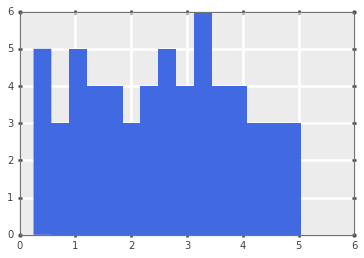

In [537]:
plt.hist(ad, bins=15)

In [538]:
ad.mean()

2.5601501177582042

In [539]:
np.median(ad)

2.5987712012067163

In [540]:
js, jl = 1e2, 2.7e3
print (jl-js)/js
print jl/js

26.0
27.0


Extra discussion required on interpretation...

Transformation back from median symmetric accuracy to magnitude; Is it meaningful? How does it compare to implied magnitude of error from MAPE?

In [541]:
magerror = 1+MSA(bwn3, bserieswl)/100
print(MSA(bwn3, bserieswl))
print(magerror, 2.7e3*magerror, 2.7e3/magerror)
print(magerror, 1e2*magerror, 1e2/magerror)

2.59877016778
(1.0259877016778454, 2770.1667945301824, 2631.6104916117069)
(1.0259877016778454, 102.59877016778454, 97.46705524487804)


In [542]:
magerror = 1+MSA(swn2, swn3)/100
print MSA(swn2, swn3)
print(magerror, 1e3*magerror, 1e3/magerror)
print(magerror, 1e2*magerror, 1e2/magerror)
np.median(np.log10(swn2/swn3))

300.0
(4.0, 4000.0, 250.0)
(4.0, 400.0, 25.0)


-0.6020599913279624

So this measure (because of the median) can and will fail when the errors are strongly discretized, particularly in the case of a majority of zero errors and a minority of other magnitude errors, where the median will report zero error. This is not strictly incorrect, the median *is* zero in that case; this is not necessarily useful though.

In [543]:
magerror = 1+MAPE(swn3, swn1)/100
print(magerror, 1e3*magerror, 1e3/magerror)
print(magerror, 1e2*magerror, 1e2/magerror)
magerror = 1+MAPE(swn1, swn3)/100
print(magerror, 1e3*magerror, 1e3/magerror)
print(magerror, 1e2*magerror, 1e2/magerror)

(2.4469496021220158, 2446.9496021220157, 408.67208672086724)
(2.4469496021220158, 244.69496021220158, 40.867208672086726)
(1.3617374005305041, 1361.7374005305041, 734.35597759922075)
(1.3617374005305041, 136.17374005305041, 73.435597759922075)


In [544]:
100*(10**((np.abs(np.log10(swn2/swn3))).mean())-1)

104.96348794551365

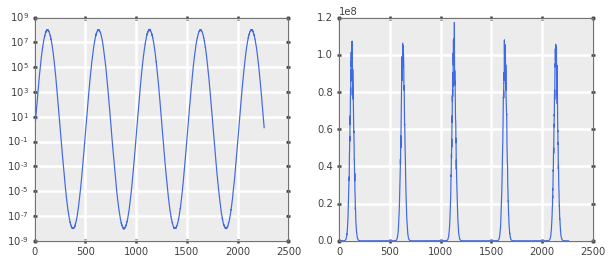

In [545]:
#Multiplicative error model for log flux
y=series
bias, sigma = 0.0, 0.05 #bias defined as signed median log ratio, sigma is std.dev.
bias2, sigma2 = 0.0, 0.2
eta = np.random.normal(size=len(y))
yhat = y*np.exp(sigma*eta+bias)
eta2 = np.random.normal(size=len(y)) #a second noisy series, a la comparing two satellites
yhat2 = y*np.exp(sigma2*eta2+bias2)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.semilogy(yhat)
ax2.plot(yhat)

(0, 4000.0)

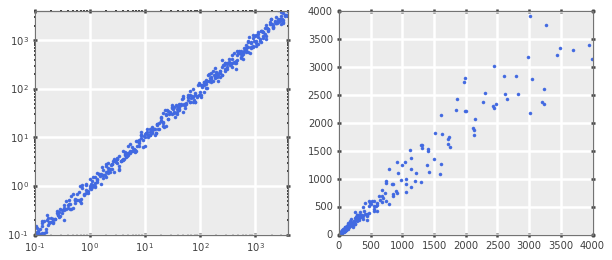

In [546]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.loglog(series,yhat2,'.')
ax1.set_xlim([1e-1,4e3])
ax1.set_ylim([1e-1,4e3])
ax2.plot(series, yhat2, '.')
ax2.set_xlim([0,4e3])
ax2.set_ylim([0,4e3])

In [547]:
print(MAPE(series, yhat2))
print(MSA(series, yhat2))
print(MAPE(yhat2, series))
print(MSA(yhat2, series))

16.1958626678
14.5053614057
16.244155409
14.5053614057


## Model test should be ground truth (unbiased with small log normal error) against mock observations
### Case 1: Unbiased, moderate log-normal error
### Case 2: Small bias, moderate log-normal error

Questions to answer: Can I get a scaling from the accuracy to the sigma (which is ~ RMSE log flux).
Method: For a range of sigma, perform multiple tests with random noise and get MSA. Find relationship between MSA (hopefully linear).

In [548]:
est_sigma_MSA = 10**(np.median(np.abs(np.log10(series/yhat2))))-1 #- np.median(np.log(yhat2/series))
est_sigma_rmse = np.sqrt(((np.log(series)-np.log(yhat2))**2).mean()) #- np.median(np.log(yhat2/series))

print(sigma2, est_sigma_MSA, est_sigma_rmse)

(0.2, 0.14505361405652373, 0.19978574675884234)


In [549]:
print(np.median(np.log10(yhat2/series)))

-0.00439742275028


In [696]:
msaarr, maearr, rmsel = [], [], []
sigarr = np.arange(0.002,6.0,0.005)
for sigma2 in sigarr:
    eta2 = np.random.normal(size=len(y)) #a second noisy series, a la comparing two satellites
    yhat2 = y*np.exp(sigma2*eta2)
    msaarr.append(MSA(series, yhat2)/100.0)
    maearr.append(np.median(np.abs(np.log(series/yhat2))))
    rmsel.append(np.sqrt(((np.log(series)-np.log(yhat2))**2).mean()))

In [697]:
print(y.min())

1.00000011352e-08


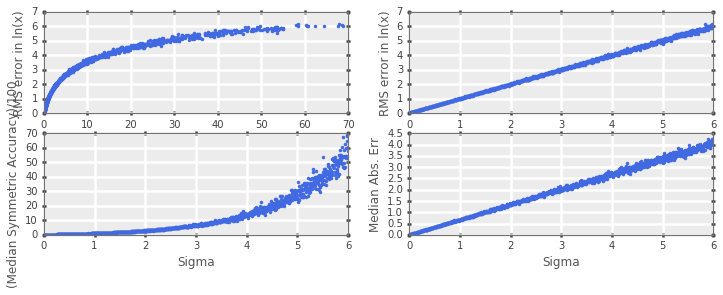

In [698]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(221)
ax1.plot(msaarr, rmsel, '.')
ax1.set_xlabel('(Median Symmetric Accuracy)/100')
ax1.set_ylabel('RMS error in ln(x)')
ax2 = fig.add_subplot(222)
ax2.plot(sigarr, np.array(rmsel), '.')
ax2.set_xlabel('Sigma')
ax2.set_ylabel('RMS error in ln(x)')
ax3 = fig.add_subplot(223)
ax3.plot(sigarr, np.array(msaarr), '.')
ax3.set_xlabel('Sigma')
ax3.set_ylabel('(Median Symmetric Accuracy)/100')
ax4 = fig.add_subplot(224)
ax4.plot(sigarr, np.array(maearr), '.')
ax4.set_xlabel('Sigma')
ax4.set_ylabel('Median Abs. Err')
fig.subplots_adjust()

In [699]:
scipy.stats.gmean(yhat2)

4.8128171702614253

In [700]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(sigarr,np.array(msaarr)*5.1)
print(slope, intercept, r_value, p_value, std_err)

(38.841483713098924, -50.243456258232541, 0.88421679725304148, 0.0, 0.59278452318074693)


In [701]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(sigarr,rmsel)
print(slope, intercept, r_value, p_value, std_err)

(1.0002451721428172, -0.0016759262189318669, 0.99956043932551242, 0.0, 0.00085712799308181454)


In [702]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(sigarr,np.array(maearr)*1.48)
print(slope, intercept, r_value, p_value, std_err)

(0.99984020728678114, -0.0047224024286975919, 0.99860135591697297, 0.0, 0.0015294198833620701)


These are small samples... what happens if I make 'series' longer?

Additional note:
The multiplicative model here has an exponential scaling, so the relative size of the error actually IS different at different orders of magnitude. That is, it assumes ln(y) is normally distributed with equal spread across all magnitudes. Does this actually hold for, say fluxes? Is this a case that I am actually interested in?
I get the same results regardless of base, so that line of reasoning is false. The ratio is constant precisely because logs are taken, irrespective of base.

Drawing on the fact that the median absolute deviation can be used as a robust estimator of the standard deviation, we analogously use the median absolute error as an estimator of the rmse (which is seen to be the standard deviation of the error distribution). So the scaling should be, and appears to be, the same: ~1.48.

An alternative thought... if I want to estimate, robustly, the spread of the errors, then maybe I want Sn of log(Q)?
The scaling from Sn to standard deviation (in the case of a gaussian) is 

In [703]:
np.median(scipy.stats.halfnorm.rvs(scale=1, size=10000))

0.66850945326545819

In [704]:
import verify
#testing Sn of log of ratio
snlogq = []
for sigma2 in sigarr:
    eta2 = np.random.normal(size=len(y)) #a second noisy series, a la comparing two satellites
    yhat2 = y*np.exp(sigma2*eta2)
    snlogq.append(verify.Sn(np.log(series/yhat2)))

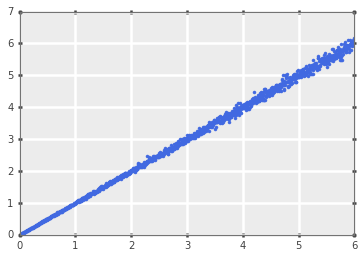

In [705]:
plt.plot(sigarr, np.array(snlogq), '.')

In [707]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(sigarr,snlogq)
print(slope, intercept, r_value, p_value, std_err)

(0.99991733040241459, 0.00091405158838187006, 0.99920030763538259, 0.0, 0.0011560397227349192)


## So Sn of log(Q) appears to be a really accurate, robust estimator of sigma (and/or RMSE log Q). The drawback is that Sn is computationally expensive. This is slower than molasses.